## Objective

You are a data scientist for a top movie studio.

After a series of box office flops, the producers at your
studio are starting to question their strategy and need a new direction. 

You suggest a new approach -
using data to determine what factors go into making a successful film.

Luckily, you have a dataset of over 5,000 films to mine for insights! The producers ask you to analyze the
data and present a report detailing your findings and recommendations on revamping the studio’s
strategy.

## Data
Attached is The Zebra movie dataset for use.
**Data Dictionary (selected columns)**
* num_critic_reviews - number of movie reviews written by critics
* num_user_reviews - number of movie reviews written by IMDB users
* num_users_voted - number of IMDB users that rated the film
* duration - the length of the film in minutes
* actor_n_facebook_likes - the number of likes on the actor’s Facebook page (we can assume this was
* measured before the film was released)
* gross - the film’s gross revenue
* movie_score - the film’s rating on a 1-10 scale by users that voted

### Goal
* only supposed to spend **6 hours** on this

### Planned Breakdown
* **1 hour** setup (power point starter and code set)
  * includes some basic time for understanding and research
* 3 key insights - **3 hours**, put each as own notebook
* what we could explore, next steps, code checking, **1 hour**
* presentation build and script build and practice **1 hours**


## A note on Data

[IMDB Site Stats](https://www.imdb.com/pressroom/stats/)

This is sample is only 5,000 of 600,000 of the Titles that are available to IMDB as of September 2024 which is about 0.83% of the available data, **can be useful to round to to a 1% sample of the total data.**



In [1]:
# !pip install missingno # only used for this shouldn't be in requirements

In [11]:
import sys

import numpy as np
import missingno as msno
import pandas as pd

sys.path.append("..")
from src.make_data import add_metrics

sys.tracebacklimit = 0 # easier to see problems


## Load Data

In [3]:

df_raw = pd.read_csv("..//data/raw/the_zebra_movie_data.csv")
print(df_raw.shape)

df = add_metrics(df_raw)

df.head(2).T

(5043, 26)
shape - (5043, 30), columns added - ['lift', 'budget_log', 'gross_log', 'decade']


,0,1
color,Color,Color
director_name,James Cameron,Gore Verbinski
num_critic_reviews,723.0,302.0
duration,178.0,169.0
director_facebook_likes,NaN,563.0
actor_3_facebook_likes,855.0,1000.0
actor_2_name,Joel David Moore,Orlando Bloom
actor_1_facebook_likes,1000.0,40000.0
gross,760505847.0,309404152.0
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy


In [4]:
# fair amount of nulls  -- dive further on those
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4032 non-null   float64
 5   actor_3_facebook_likes     4931 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5010 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_users_voted            5043 non-null   int64  
 13  cast_total_facebook_likes  5010 non-null   float

In [5]:
# examine cardinality
df.nunique().to_frame()

,0
color,2
director_name,2398
num_critic_reviews,528
duration,191
director_facebook_likes,434
actor_3_facebook_likes,905
actor_2_name,3032
actor_1_facebook_likes,877
gross,4035
genres,914


In [6]:
df.sort_values("lift", ascending=False)[["movie_title", "lift", "gross", "budget"]]

,movie_title,lift,gross,budget
4793,Paranormal Activity,7194.485533,107917283.0,15000.0
4799,Tarnation,2715.660550,592014.0,218.0
4707,The Blair Witch Project,2342.168567,140530114.0,60000.0
4984,The Brothers McMullen,409.864000,10246600.0,25000.0
3278,The Texas Chain Saw Massacre,369.427285,30859000.0,83532.0
...,...,...,...,...
5036,The Mongol King,NaN,NaN,3250.0
5038,Signed Sealed Delivered,NaN,NaN,NaN
5039,The Following,NaN,NaN,NaN
5040,A Plague So Pleasant,NaN,NaN,1400.0


## Profile Some Missing Data

In [9]:
# check the percent missing
# a note: facebook likes as 0 could also be a null, same for reviews and everything else
# would need to go to the source and understand them better

# df.style.background_gradient()

df_zeros = df_raw.replace(0, np.nan) # this will be added in to make_data

df_profile = pd.concat([(df_raw.isnull().sum() / len(df) * 100).to_frame(name="raw_nulls"),
            (df_zeros.isnull().sum() / len(df_zeros) * 100).\
            to_frame(name="with_zeros")], axis=1).sort_values(by="with_zeros", ascending=False) # zeros should be strictly greater than


df_profile = df_profile.assign(null_diff = np.abs(df_profile["raw_nulls"] - df_profile["with_zeros"]))

df_profile.sort_values("null_diff", ascending=False)

,raw_nulls,with_zeros,null_diff
movie_facebook_likes,0.000000,43.248067,43.248067
director_facebook_likes,2.062265,20.047591,17.985326
actor_3_facebook_likes,0.456078,2.220900,1.764823
actor_2_facebook_likes,0.257783,1.348404,1.090621
cast_total_facebook_likes,0.000000,0.654372,0.654372
actor_1_facebook_likes,0.138806,0.654372,0.515566
content_rating,6.008328,6.008328,0.000000
gross,17.529248,17.529248,0.000000
aspect_ratio,6.523895,6.523895,0.000000
budget,9.756098,9.756098,0.000000


***

Data we definitely have - genres, num_users_voted, movie_title, movie_score

Data missing we should explore a bit, title_year, gross, budget

## Additional Missing Profile

<Axes: >

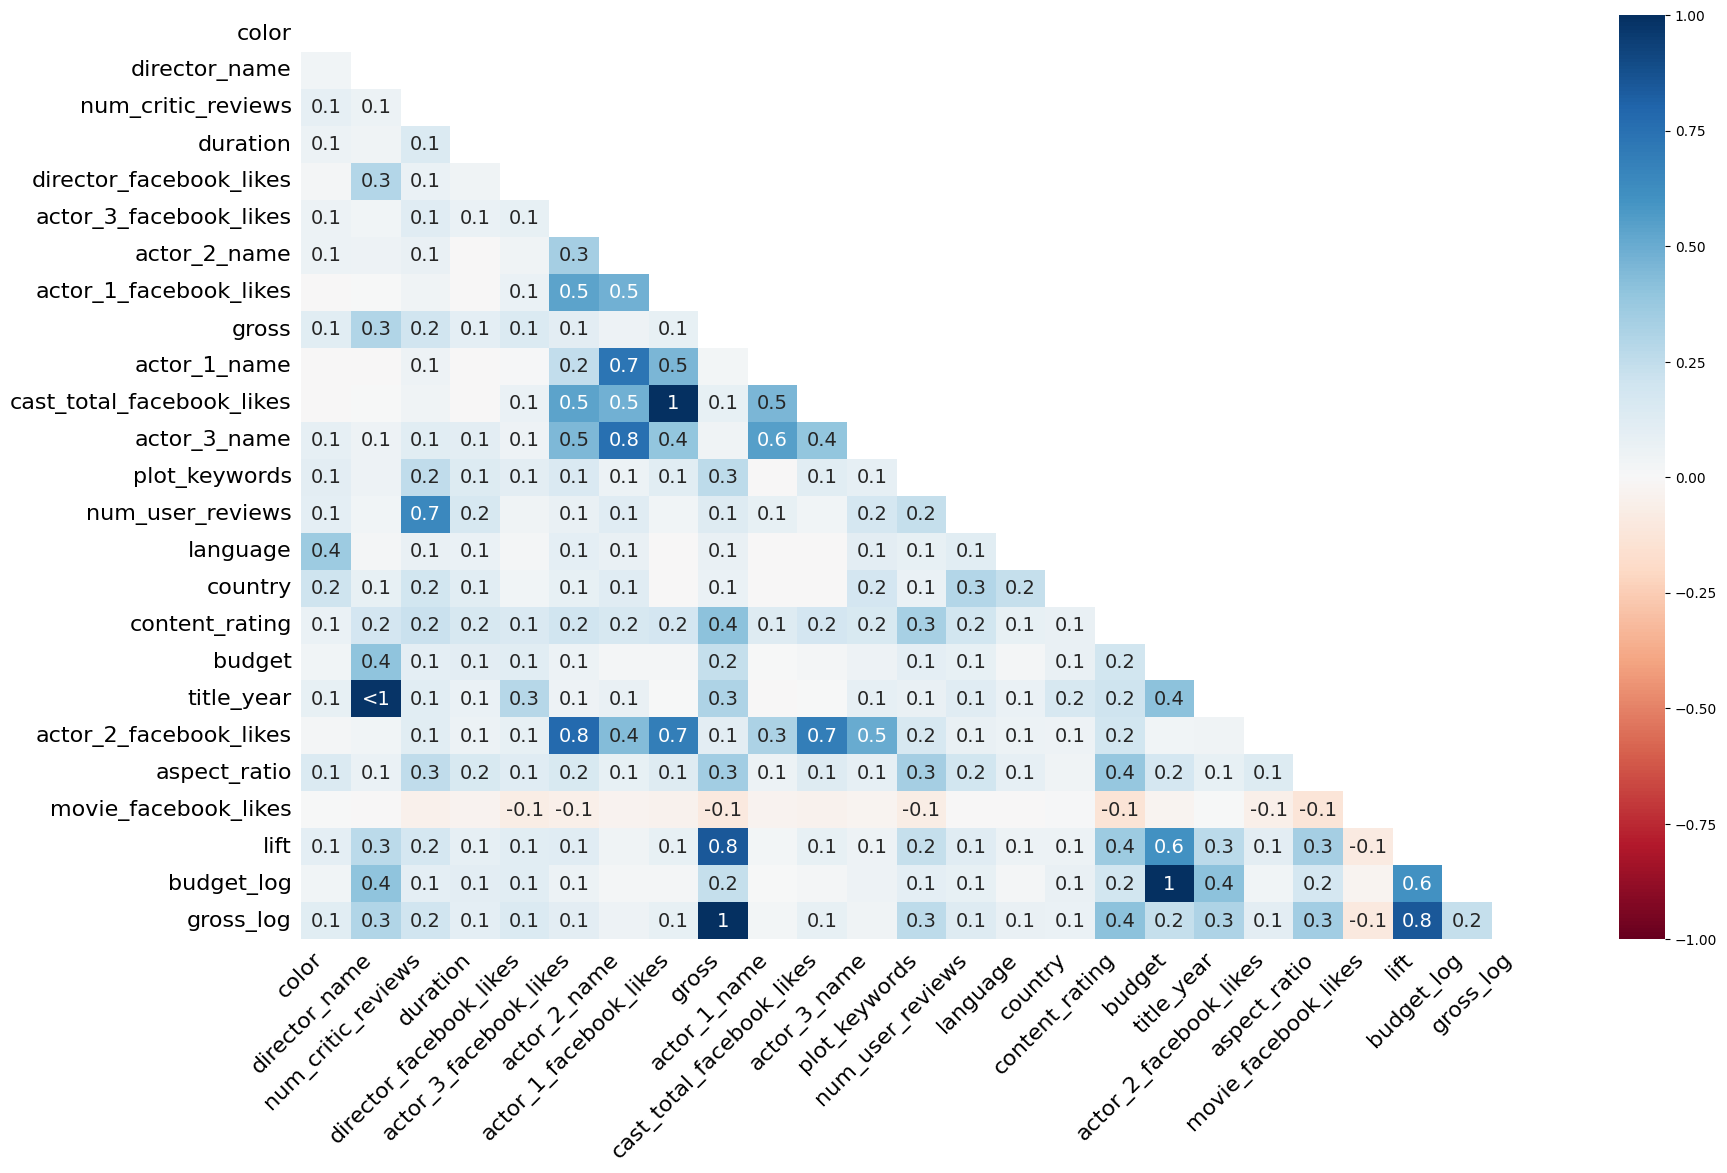

In [12]:
msno.heatmap(df)